In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
import os
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [59]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\03-CNN-Convolutional-Neural-Networks'

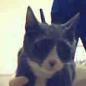

In [60]:
with Image.open('C:\\Users\\SEEMA YADAV\\Desktop\\CATS_DOGS\\test\\CAT\\10107.jpg') as img:
    display(img)

In [61]:
Image.__version__

'5.4.1'

In [62]:
path='C:\\Users\\SEEMA YADAV\\Desktop\\CATS_DOGS'
img_names=[]
for folders,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folders+'\\'+img)

In [63]:
img_size=[]
rejected=[]
for item in img_names:
    try:
        with Image.open(item) as img:
            img_size.append(img.size)
    except:
        rejected.append(img.size)

In [64]:
len(img_size)

24994

In [65]:
len(rejected)

0

In [66]:
df=pd.DataFrame(data=img_size)

In [67]:
df


,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240
...,...,...
24989,500,375
24990,350,262
24991,250,181
24992,494,500


In [68]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [69]:
dog=Image.open('C:\\Users\\SEEMA YADAV\\Desktop\\CATS_DOGS\\train\\DOG\\14.jpg')

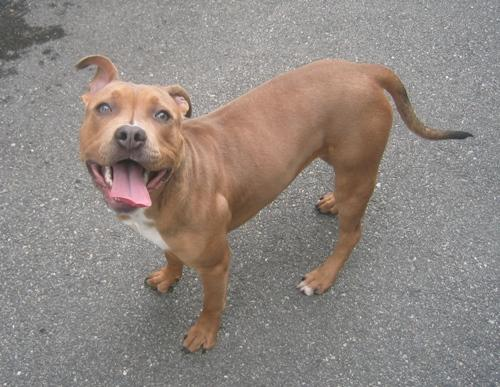

In [70]:
dog

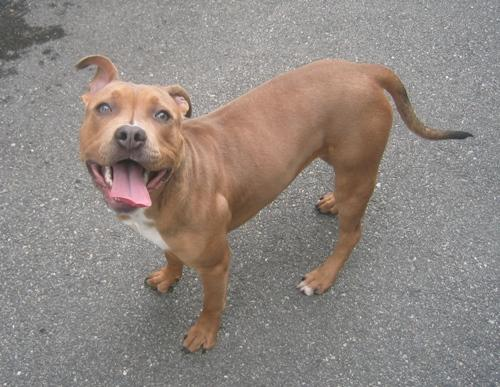

In [71]:
display(dog)

In [72]:
dog.size

(500, 387)

In [73]:
dog.getpixel((0,0))

(90, 95, 98)

torch.Size([3, 387, 500])


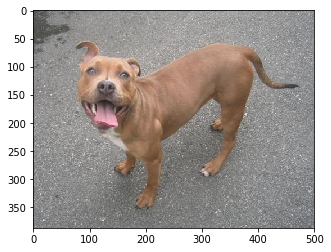

In [74]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [75]:
im.size()

torch.Size([3, 387, 500])

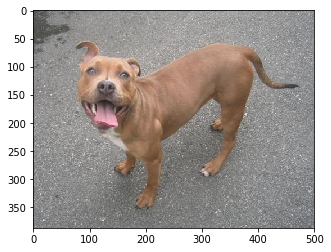

In [76]:
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [77]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

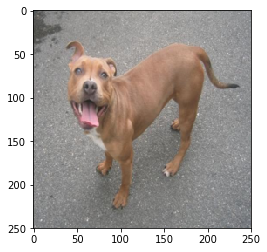

In [83]:
transform=transforms.Compose([
    transforms.Resize((250,250)),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im=transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

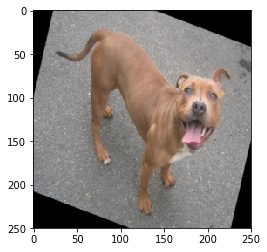

In [90]:
transform=transforms.Compose([
    transforms.RandomHorizontalFlip(1),
    transforms.RandomRotation(30),
    transforms.Resize((250,250)),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im=transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


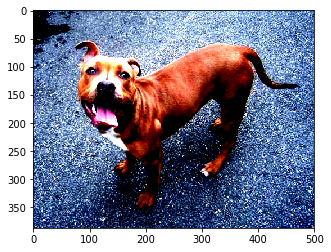

In [91]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229, 0.224, 0.225])
])
im=transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

 im[:,0,0]

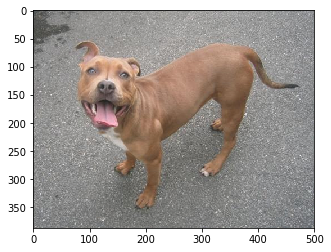

In [94]:
inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225]
                                  ,std=[1/0.229,1/0.224,1/0.225])
im1=inv_normalize(im)
plt.imshow(np.transpose(im1.numpy(),(1,2,0)))